<a href="https://colab.research.google.com/github/swapnalishamrao/Bengalore_House_Price_Prediction/blob/main/Benglore_Housing_Price_Perediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Bussiness Problem - Predict the Price of Benglore House

Using Linear Regression - Supervised Machine Learning Algorithm


""" ****Project Steps****
---------------------------
1. Look at the data big picture.
2. Get the Data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Selectt  a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor and maintaing your system.

"""

##1.Bussiness Problem
 The main goal of this project is to find the price of the Benglore house using their features.

## Load/Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##2.Load data

Load csv file from google drive

Main Source:kaggle.com/datasets/swapnalimanepatil/banglore-house-price-prediction


In [ ]:
from google.colab import drive           #Mounting google drive to colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Bengaluru_House_Data.csv'
df = pd.read_csv(path)
df.shape

(13320, 9)

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


###3. Exploratory Data Analysis

In [ ]:
df1 = df.copy()    # get the copy of the raw data

In [ ]:
# get the information of the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


* We have only 3 numerical features - bath, balcony and price
* Six categorical features - area type, availability,size, society, and total_srft
* Target Feature ===== >>>>> price >>>>>
* price in lakh

In [ ]:
df1.describe()
# we observe 75% and max value it shows huge diff

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


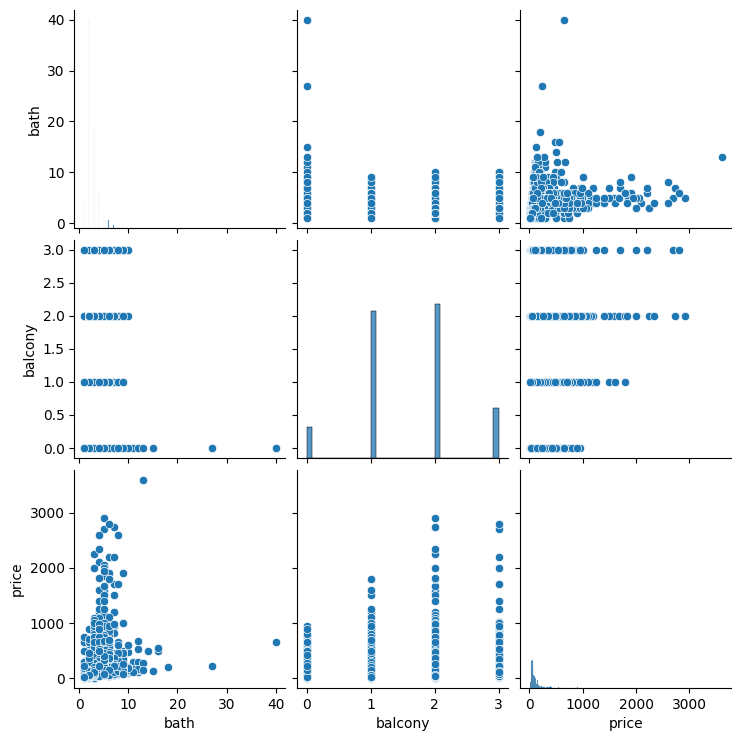

In [ ]:
sns.pairplot(df1)

# bath and price have slightly linear correlation with some outliers

In [ ]:
# value count of each features
def value_count(d1):
  for var in df.columns:
    print(df[var].value_counts())
    print("--------------------------------")

In [ ]:
value_count(df1)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
--------------------------------
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
--------------------------------
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
-----------------------------

<Axes: >

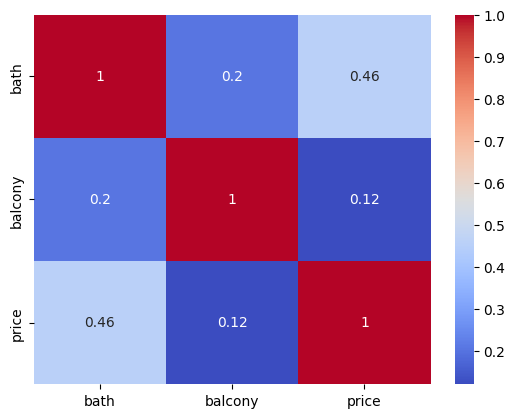

In [ ]:
# correlation heatmap
num_vars = ["bath","balcony","price"]
sns.heatmap(df1[num_vars].corr(),cmap="coolwarm", annot=True)

#correlation of bath is greater than a balcony with price

# Prepare Data For Machine Learning Model

### Data Cleaning

In [ ]:
#find the how much missing data available
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
# 5 of missing value
df1. isnull().mean()*100

# society has 41.3% missing value(need to drop)

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

<Axes: >

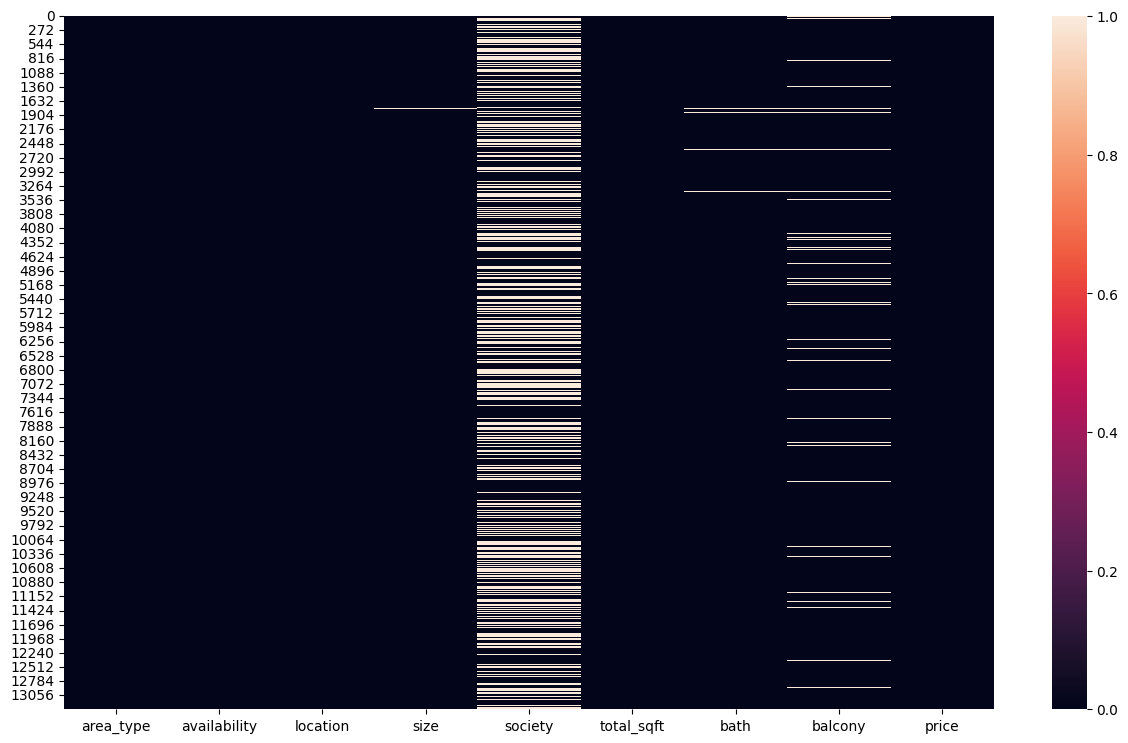

In [ ]:
# visualize missing value using heatmap to get idea where is the value missing
plt.figure(figsize=(15,9))
sns.heatmap(df.isnull())

In [ ]:
# Drop --------> society feature
# because 41.3% missing value
df2 = df1.drop('society', axis='columns')
df2.shape

(13320, 8)

In [ ]:
# fill mean value in -------> balcony feature
# because it contain 4.5% missing value
df2['balcony'] = df2['balcony'].fillna(df2['balcony'].mean())
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [ ]:
# drop na value rows from df2
# because there is very less % missing value
df3 = df2.dropna()
df3.shape

(13246, 8)

In [ ]:
df3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [ ]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


# Feature Engineering

In [ ]:
# to show all the columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

###Converting 'total_sqft' cat feature in numeric

In [ ]:
df3['total_sqft'].value_counts()

# here we observe that 'total_sqft' contain string value in diff format
# float, int like value 1689.28,817
# range value: 540-740
# number and string: 142.845Sq.meter,1175Sq.yards, 1Grounds

#best way is to convert it into number by splitting it

1200                 843
1100                 221
1500                 204
2400                 195
600                  180
1000                 172
1350                 132
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 100
1140                  91
2000                  82
1450                  70
1650                  69
800                   67
3000                  66
1075                  66
1020                  63
2500                  62
1125                  60
1160                  60
1550                  60
950                   59
1700                  58
1180                  58
1260                  57
1255                  56
1080                  55
1220                  55
1070                  53
750                   52
700                   52
4000                  48
1175                  48
1225                  48


In [ ]:
total_sqft_int = []
for str_val in df3['total_sqft']:
  try:
    total_sqft_int.append(float(str_val)) # if 123.4 like this value in str then convert in float
  except:
    try:
        temp = []
        temp = str_val.split('-')
        total_sqft_int.append((float(temp[0])+float(temp[-1]))/2) # if 123-453 this str value split
    except:
      total_sqft_int.append(np.nan)  # if value not contain in above format then consider as nan


In [ ]:
# reset the index of df
df4 = df3.reset_index(drop= True)

#drop= True -don't add index column in df

In [ ]:
# join df4 nad total_sqft_int list
df5 = df4.join(pd.DataFrame({'total_sqft_int': total_sqft_int}))
df5.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


In [ ]:
df5.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
13241,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,3453.0
13242,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0,3600.0
13243,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,1141.0
13244,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,4689.0
13245,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,550.0


In [ ]:
df5.isnull().sum()

area_type          0
availability       0
location           0
size               0
total_sqft         0
bath               0
balcony            0
price              0
total_sqft_int    46
dtype: int64

In [ ]:
#drop na value
df6 = df5.dropna()
df6.shape

(13200, 9)

## Working on <<<<Size>>>>> feature

In [ ]:
df6['size'].value_counts()

#size feature shows the number of rooms

2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [ ]:
"""
in size feature we assume that
2BHK = 2 Bedroom == 2RK
so takes only number and remove sufix text
"""
size_int = []
for str_val in df6['size']:
  temp = []
  temp = str_val.split(" ")
  try:
    size_int.append(int(temp[0]))
  except:
    size_int.append(np.nan)
    print("Noice=",str_val)

In [ ]:
df6 = df6.reset_index(drop = True)

In [ ]:
#join df6 and size_int
df7 = df6.join(pd.DataFrame({'bhk':size_int}))
df7.shape



(13200, 10)

In [ ]:
df7.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
13195,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,3453.0,5
13196,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0,3600.0,4
13197,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,1141.0,2
13198,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,4689.0,4
13199,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,550.0,1


## Finding Outlier and Removing

In [ ]:
# function to create histogram, Q-Q plot and boxplot

# for Q-Q plots
import scipy.stats as stats

def diganostic_plots(df, variable):
  # fuction takes a dataframe (df) and
  # the variable of interest as arguments

  # define figure size
  plt.figure(figsize=(15,15))

  # histogram
  plt.subplot(1,3,1)
  sns.displot(df[variable], bins=15)
  plt.title('Histogram')

  #Q-Q plot
  plt.subplot(1,3,2)
  stats.probplot(df[variable], dist="norm", plot= plt)
  plt.ylabel('Variable quantities')

  #boxplot
  plt.subplot(1,3,3)
  sns.boxplot(y=df[variable])
  plt.title('Boxplot')

  plt.show()

******* bath *******


<ipython-input-51-6c78e764b1e4>:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,2)


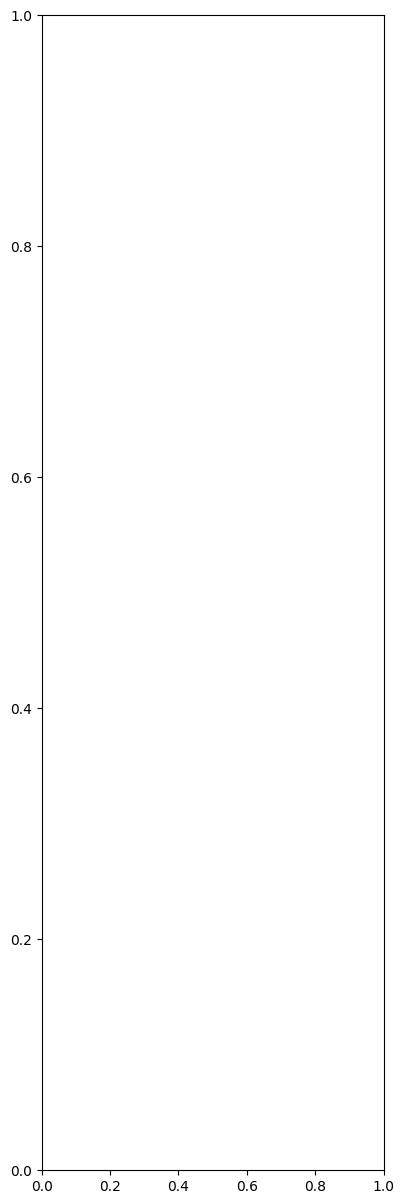

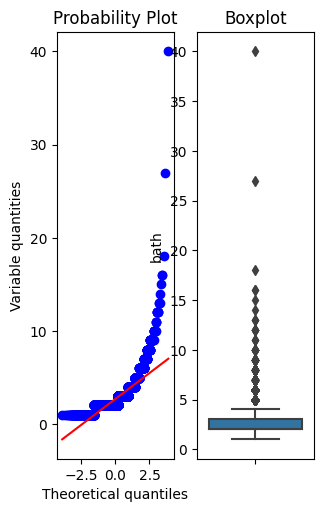

******* balcony *******


<ipython-input-51-6c78e764b1e4>:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,2)


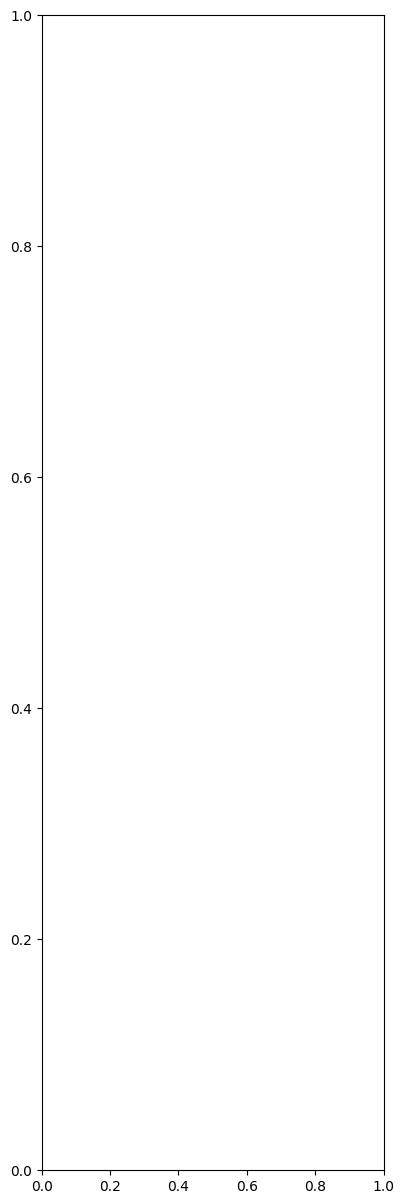

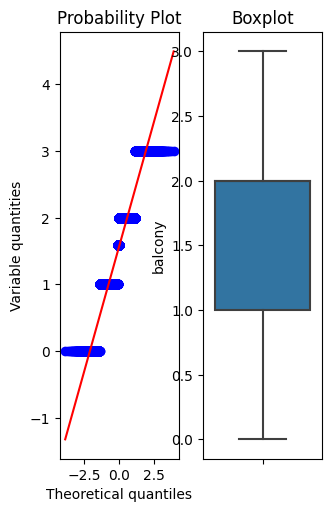

******* total_sqft_int *******


<ipython-input-51-6c78e764b1e4>:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,2)


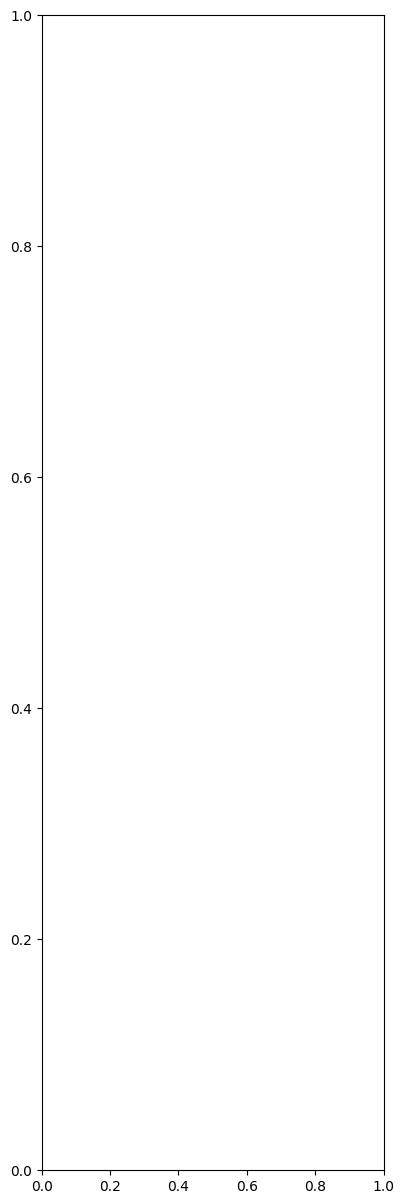

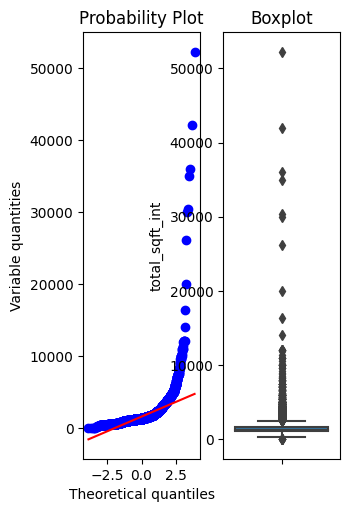

******* bhk *******


<ipython-input-51-6c78e764b1e4>:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,2)


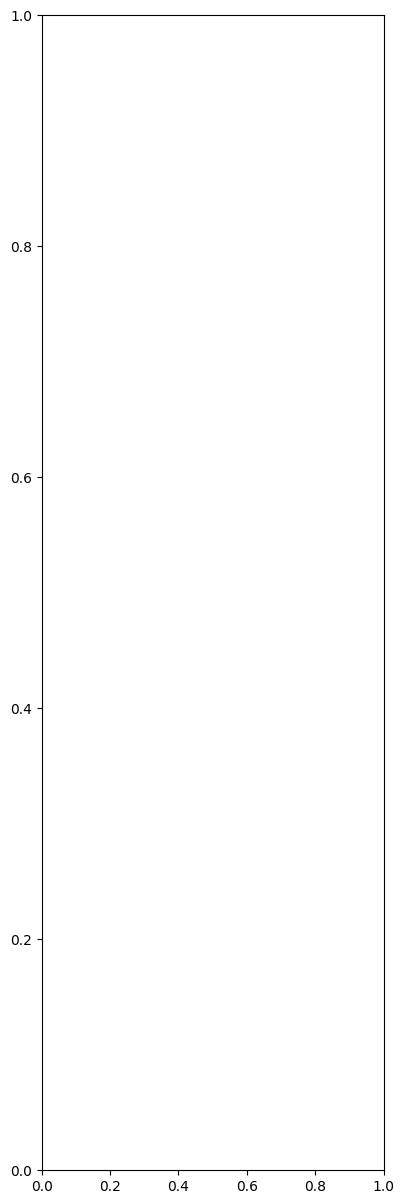

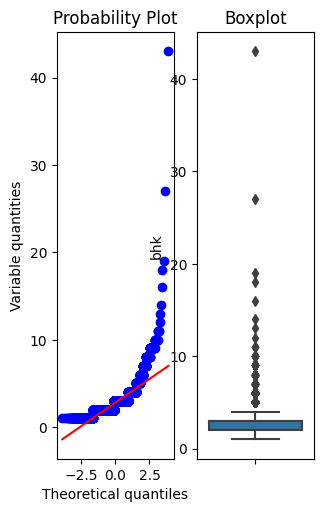

******* price *******


<ipython-input-51-6c78e764b1e4>:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,2)


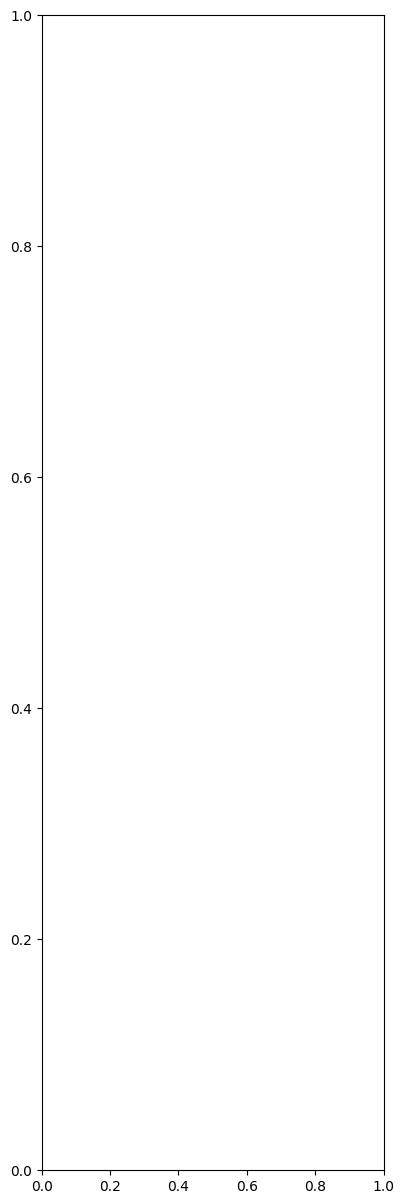

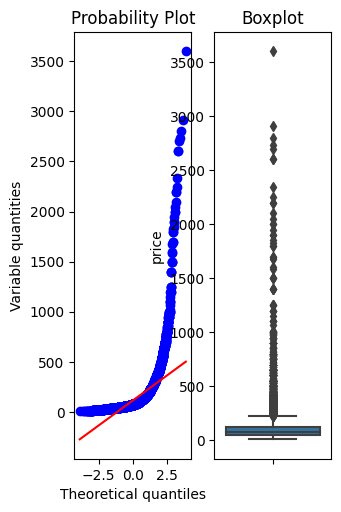

In [ ]:
num_var = ["bath","balcony","total_sqft_int","bhk","price"]
for var in num_var:
  print("******* {} *******".format(var))
  diganostic_plots(df7, var)

# here we observe outlier using histogram,,qq plot and boxplot